In [1]:
import sys
sys.path.append('../src')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import tensorflow as tf
from gait.config import pd
from gait.utils import get_data_by_overlap_percent,get_overlap_data_all_sessions,  split_test_train_by_subjects, remove_invalid_data, get_overlap_data_all_sessions
from gait.training import train_model
from gait.evalution import save_history, save_test_history, save_accuracy_loss_figure, save_confusion_matrix_figure, compute_validations_predictions

In [2]:
def compute_resultant_acceleration(X):
    return np.sqrt(X[:,:,0] **2 + X[:,:,1] ** 2 + X[:,:,2] ** 2)

def compute_resultant_gyro(X):
    return np.sqrt(X[:,:,3] **2 + X[:,:,4] ** 2 + X[:,:,5] ** 2)

def compute_resultant_angle(X):
    return np.sqrt(X[:,:,6] **2 + X[:,:,7] ** 2 + X[:,:,8] ** 2)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
181/181 [==============================] - 12s 23ms/step - loss: 0.9770 - accuracy: 0.5915 - val_loss: 0.9798 - val_accuracy: 0.6376
Epoch 2/50
181/181 [==============================] - 3s 17ms/step - loss: 0.7612 - accuracy: 0.7009 - val_loss: 0.7885 - val_accuracy: 0.6939
Epoch 3/50
181/181 [==============================] - 3s 16ms/step - loss: 0.6919 - accuracy: 0.7345 - val_loss: 0.7563 - val_accuracy: 0.7263
Epoch 4/50
181/181 [==============================] - 3s 15ms/step - loss: 0.6482 - accuracy: 0.7529 - val_loss: 0.8545 - val_accuracy: 0.6849
Epoch 5/50
181/181 [==============================] - 3s 16ms/step - loss: 0.6134 - accuracy: 0.7681 - val_loss: 0.8346 - val_accuracy: 0.6844
Epoch 6/50
181/181 [==============================] - 3s 16ms/step - loss: 0.5869 - accuracy: 0.7795 - val_loss: 0.7362 - val_accuracy: 0.7294
Epoch 7/50
181/181 [==============================] - 3s 15ms/step - loss: 0.5588 - accuracy: 0.7921 - val_loss: 0.8020 - val_accuracy: 0.715

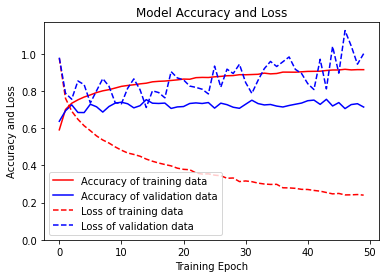

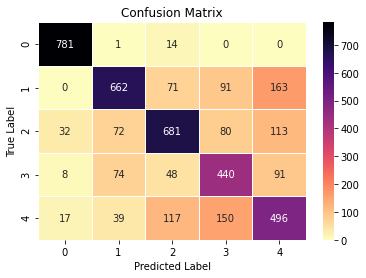

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_10 (TimeDi  (None, None, 21, 64)     9280      
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, None, 21, 64)     256       
 stributed)                                                      
                                                                 
 time_distributed_12 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                  

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
174/174 [==============================] - 13s 29ms/step - loss: 0.9466 - accuracy: 0.6181 - val_loss: 0.8444 - val_accuracy: 0.6533
Epoch 2/50
174/174 [==============================] - 3s 17ms/step - loss: 0.7185 - accuracy: 0.7204 - val_loss: 0.7722 - val_accuracy: 0.7351
Epoch 3/50
174/174 [==============================] - 3s 17ms/step - loss: 0.6618 - accuracy: 0.7478 - val_loss: 0.7084 - val_accuracy: 0.7594
Epoch 4/50
174/174 [==============================] - 3s 18ms/step - loss: 0.6148 - accuracy: 0.7655 - val_loss: 0.8068 - val_accuracy: 0.7488
Epoch 5/50
174/174 [==============================] - 3s 17ms/step - loss: 0.5841 - accuracy: 0.7822 - val_loss: 0.8309 - val_accuracy: 0.7290
Epoch 6/50
174/174 [==============================] - 3s 16ms/step - loss: 0.5506 - accuracy: 0.7916 - val_loss: 0.8129 - val_accuracy: 0.7517
Epoch 7/50
174/174 [==============================] - 3s 17ms/step - loss: 0.5152 - accuracy: 0.8100 - val_loss: 0.7986 - val_accuracy: 0.748

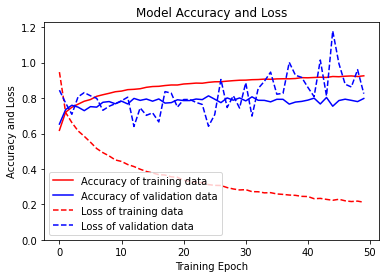

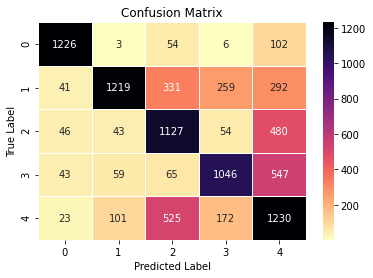

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_20 (TimeDi  (None, None, 21, 64)     9280      
 stributed)                                                      
                                                                 
 time_distributed_21 (TimeDi  (None, None, 21, 64)     256       
 stributed)                                                      
                                                                 
 time_distributed_22 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                                                                 
 time_distributed_23 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                  

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
245/245 [==============================] - 10s 24ms/step - loss: 0.9444 - accuracy: 0.6114 - val_loss: nan - val_accuracy: 0.6537
Epoch 2/50
245/245 [==============================] - 4s 16ms/step - loss: 0.7441 - accuracy: 0.7132 - val_loss: nan - val_accuracy: 0.6960
Epoch 3/50
245/245 [==============================] - 4s 15ms/step - loss: 0.6792 - accuracy: 0.7378 - val_loss: nan - val_accuracy: 0.7353
Epoch 4/50
245/245 [==============================] - 4s 15ms/step - loss: 0.6452 - accuracy: 0.7544 - val_loss: nan - val_accuracy: 0.7101
Epoch 5/50
245/245 [==============================] - 4s 15ms/step - loss: 0.6034 - accuracy: 0.7731 - val_loss: nan - val_accuracy: 0.7325
Epoch 6/50
245/245 [==============================] - 4s 15ms/step - loss: 0.5855 - accuracy: 0.7813 - val_loss: nan - val_accuracy: 0.7064
Epoch 7/50
245/245 [==============================] - 4s 15ms/step - loss: 0.5536 - accuracy: 0.7943 - val_loss: nan - val_accuracy: 0.7162
Epoch 8/50
245/245 

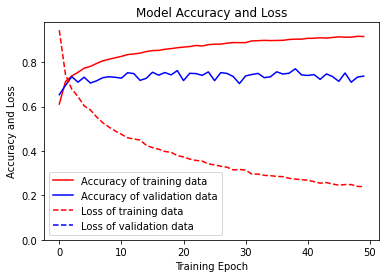

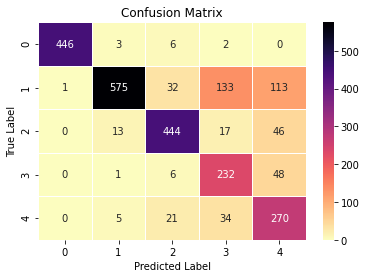

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_30 (TimeDi  (None, None, 21, 64)     9280      
 stributed)                                                      
                                                                 
 time_distributed_31 (TimeDi  (None, None, 21, 64)     256       
 stributed)                                                      
                                                                 
 time_distributed_32 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                                                                 
 time_distributed_33 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                  

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
274/274 [==============================] - 12s 23ms/step - loss: 0.9309 - accuracy: 0.6202 - val_loss: 0.8520 - val_accuracy: 0.6957
Epoch 2/50
274/274 [==============================] - 4s 15ms/step - loss: 0.7381 - accuracy: 0.7146 - val_loss: 1.0418 - val_accuracy: 0.6333
Epoch 3/50
274/274 [==============================] - 4s 15ms/step - loss: 0.6727 - accuracy: 0.7439 - val_loss: 0.9032 - val_accuracy: 0.6903
Epoch 4/50
274/274 [==============================] - 4s 15ms/step - loss: 0.6232 - accuracy: 0.7651 - val_loss: 0.8160 - val_accuracy: 0.7325
Epoch 5/50
274/274 [==============================] - 4s 16ms/step - loss: 0.5884 - accuracy: 0.7787 - val_loss: 0.8005 - val_accuracy: 0.7322
Epoch 6/50
274/274 [==============================] - 4s 15ms/step - loss: 0.5589 - accuracy: 0.7931 - val_loss: 0.8690 - val_accuracy: 0.7233
Epoch 7/50
274/274 [==============================] - 4s 16ms/step - loss: 0.5247 - accuracy: 0.8082 - val_loss: 0.8758 - val_accuracy: 0.729

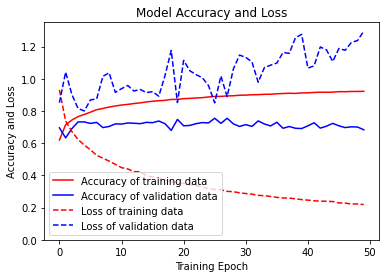

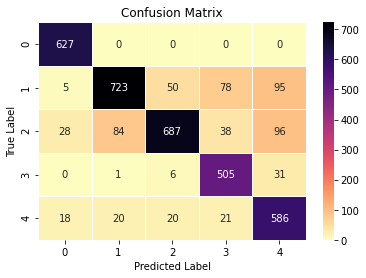

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_40 (TimeDi  (None, None, 21, 64)     9280      
 stributed)                                                      
                                                                 
 time_distributed_41 (TimeDi  (None, None, 21, 64)     256       
 stributed)                                                      
                                                                 
 time_distributed_42 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                                                                 
 time_distributed_43 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                  

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
328/328 [==============================] - 11s 19ms/step - loss: 0.8993 - accuracy: 0.6374 - val_loss: nan - val_accuracy: 0.6545
Epoch 2/50
328/328 [==============================] - 5s 15ms/step - loss: 0.7141 - accuracy: 0.7294 - val_loss: nan - val_accuracy: 0.6858
Epoch 3/50
328/328 [==============================] - 8s 23ms/step - loss: 0.6502 - accuracy: 0.7543 - val_loss: nan - val_accuracy: 0.6647
Epoch 4/50
328/328 [==============================] - 7s 22ms/step - loss: 0.5953 - accuracy: 0.7739 - val_loss: nan - val_accuracy: 0.7340
Epoch 5/50
328/328 [==============================] - 7s 21ms/step - loss: 0.5582 - accuracy: 0.7936 - val_loss: nan - val_accuracy: 0.7293
Epoch 6/50
328/328 [==============================] - 6s 18ms/step - loss: 0.5318 - accuracy: 0.8042 - val_loss: nan - val_accuracy: 0.7525
Epoch 7/50
328/328 [==============================] - 6s 19ms/step - loss: 0.5025 - accuracy: 0.8170 - val_loss: nan - val_accuracy: 0.7268
Epoch 8/50
328/328 

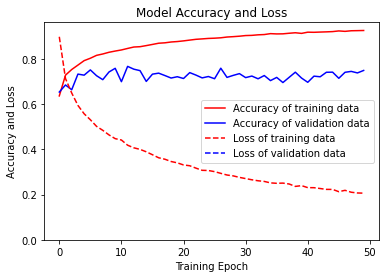

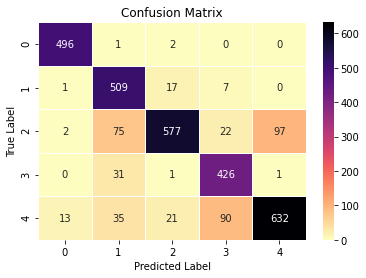

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_50 (TimeDi  (None, None, 21, 64)     9280      
 stributed)                                                      
                                                                 
 time_distributed_51 (TimeDi  (None, None, 21, 64)     256       
 stributed)                                                      
                                                                 
 time_distributed_52 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                                                                 
 time_distributed_53 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                  

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
336/336 [==============================] - 12s 22ms/step - loss: 0.8533 - accuracy: 0.6562 - val_loss: 0.9531 - val_accuracy: 0.6682
Epoch 2/50
336/336 [==============================] - 5s 15ms/step - loss: 0.6563 - accuracy: 0.7503 - val_loss: 0.7401 - val_accuracy: 0.7422
Epoch 3/50
336/336 [==============================] - 5s 15ms/step - loss: 0.5953 - accuracy: 0.7789 - val_loss: 0.9276 - val_accuracy: 0.7101
Epoch 4/50
336/336 [==============================] - 5s 14ms/step - loss: 0.5461 - accuracy: 0.7980 - val_loss: 0.7666 - val_accuracy: 0.7697
Epoch 5/50
336/336 [==============================] - 5s 15ms/step - loss: 0.5022 - accuracy: 0.8139 - val_loss: 0.9278 - val_accuracy: 0.7391
Epoch 6/50
336/336 [==============================] - 5s 14ms/step - loss: 0.4792 - accuracy: 0.8254 - val_loss: 0.8689 - val_accuracy: 0.7514
Epoch 7/50
336/336 [==============================] - 5s 15ms/step - loss: 0.4514 - accuracy: 0.8359 - val_loss: 0.8195 - val_accuracy: 0.770

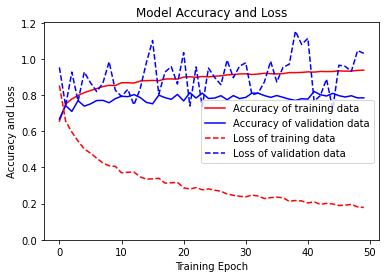

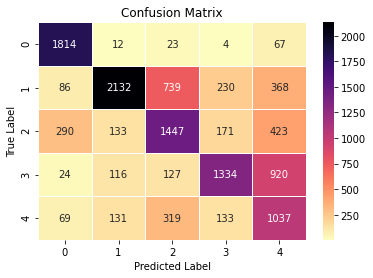

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_60 (TimeDi  (None, None, 21, 64)     9280      
 stributed)                                                      
                                                                 
 time_distributed_61 (TimeDi  (None, None, 21, 64)     256       
 stributed)                                                      
                                                                 
 time_distributed_62 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                                                                 
 time_distributed_63 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                  

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
419/419 [==============================] - 12s 17ms/step - loss: 0.8179 - accuracy: 0.6803 - val_loss: 0.8599 - val_accuracy: 0.7039
Epoch 2/50
419/419 [==============================] - 6s 15ms/step - loss: 0.6257 - accuracy: 0.7638 - val_loss: 0.7356 - val_accuracy: 0.7436
Epoch 3/50
419/419 [==============================] - 6s 14ms/step - loss: 0.5574 - accuracy: 0.7909 - val_loss: 0.9238 - val_accuracy: 0.7214
Epoch 4/50
419/419 [==============================] - 6s 14ms/step - loss: 0.5019 - accuracy: 0.8161 - val_loss: 1.0618 - val_accuracy: 0.7154
Epoch 5/50
419/419 [==============================] - 6s 14ms/step - loss: 0.4604 - accuracy: 0.8321 - val_loss: 0.8397 - val_accuracy: 0.7585
Epoch 6/50
419/419 [==============================] - 6s 14ms/step - loss: 0.4274 - accuracy: 0.8456 - val_loss: 0.7505 - val_accuracy: 0.7891
Epoch 7/50
419/419 [==============================] - 6s 14ms/step - loss: 0.4037 - accuracy: 0.8557 - val_loss: 0.7042 - val_accuracy: 0.794

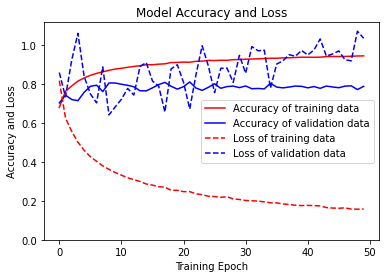

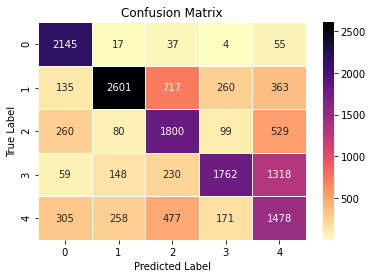

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_70 (TimeDi  (None, None, 21, 64)     9280      
 stributed)                                                      
                                                                 
 time_distributed_71 (TimeDi  (None, None, 21, 64)     256       
 stributed)                                                      
                                                                 
 time_distributed_72 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                                                                 
 time_distributed_73 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                  

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
660/660 [==============================] - 16s 18ms/step - loss: 0.8038 - accuracy: 0.6816 - val_loss: 0.7414 - val_accuracy: 0.7443
Epoch 2/50
660/660 [==============================] - 9s 14ms/step - loss: 0.6293 - accuracy: 0.7638 - val_loss: 0.7461 - val_accuracy: 0.7633
Epoch 3/50
660/660 [==============================] - 9s 14ms/step - loss: 0.5468 - accuracy: 0.7987 - val_loss: 0.7386 - val_accuracy: 0.7845
Epoch 4/50
660/660 [==============================] - 10s 14ms/step - loss: 0.4916 - accuracy: 0.8191 - val_loss: 0.6667 - val_accuracy: 0.7896
Epoch 5/50
660/660 [==============================] - 10s 15ms/step - loss: 0.4534 - accuracy: 0.8354 - val_loss: 0.7960 - val_accuracy: 0.7702
Epoch 6/50
660/660 [==============================] - 9s 14ms/step - loss: 0.4265 - accuracy: 0.8471 - val_loss: 0.7474 - val_accuracy: 0.7792
Epoch 7/50
660/660 [==============================] - 10s 15ms/step - loss: 0.4005 - accuracy: 0.8563 - val_loss: 0.5799 - val_accuracy: 0.

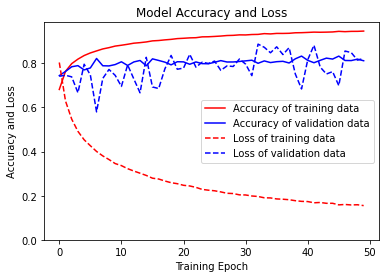

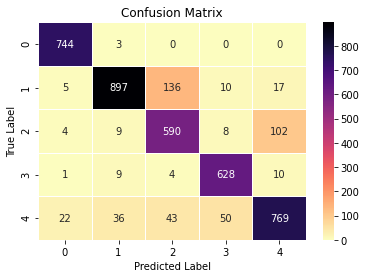

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_80 (TimeDi  (None, None, 21, 64)     9280      
 stributed)                                                      
                                                                 
 time_distributed_81 (TimeDi  (None, None, 21, 64)     256       
 stributed)                                                      
                                                                 
 time_distributed_82 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                                                                 
 time_distributed_83 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                  

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
826/826 [==============================] - 18s 16ms/step - loss: 0.7131 - accuracy: 0.7228 - val_loss: 0.7430 - val_accuracy: 0.7505
Epoch 2/50
826/826 [==============================] - 11s 14ms/step - loss: 0.5112 - accuracy: 0.8118 - val_loss: 0.9808 - val_accuracy: 0.7386
Epoch 3/50
826/826 [==============================] - 11s 14ms/step - loss: 0.4304 - accuracy: 0.8451 - val_loss: 0.8648 - val_accuracy: 0.7760
Epoch 4/50
826/826 [==============================] - 11s 14ms/step - loss: 0.3879 - accuracy: 0.8625 - val_loss: 0.8733 - val_accuracy: 0.7830
Epoch 5/50
826/826 [==============================] - 11s 14ms/step - loss: 0.3568 - accuracy: 0.8745 - val_loss: 0.6939 - val_accuracy: 0.8135
Epoch 6/50
826/826 [==============================] - 11s 14ms/step - loss: 0.3331 - accuracy: 0.8829 - val_loss: 0.8864 - val_accuracy: 0.7783
Epoch 7/50
826/826 [==============================] - 12s 14ms/step - loss: 0.3120 - accuracy: 0.8915 - val_loss: 0.9368 - val_accuracy:

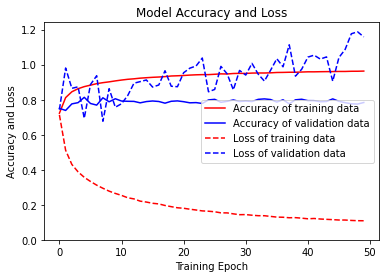

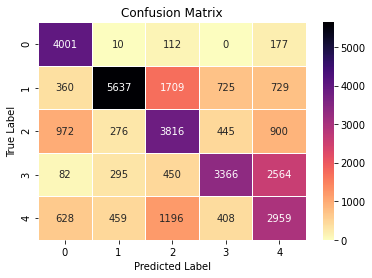

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_90 (TimeDi  (None, None, 21, 64)     9280      
 stributed)                                                      
                                                                 
 time_distributed_91 (TimeDi  (None, None, 21, 64)     256       
 stributed)                                                      
                                                                 
 time_distributed_92 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                                                                 
 time_distributed_93 (TimeDi  (None, None, 21, 64)     0         
 stributed)                                                      
                  

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
1952/1952 [==============================] - 34s 15ms/step - loss: 0.6535 - accuracy: 0.7488 - val_loss: 0.7849 - val_accuracy: 0.7482
Epoch 2/50
1952/1952 [==============================] - 27s 14ms/step - loss: 0.4516 - accuracy: 0.8370 - val_loss: 0.7407 - val_accuracy: 0.7605
Epoch 3/50
1952/1952 [==============================] - 27s 14ms/step - loss: 0.3771 - accuracy: 0.8650 - val_loss: 0.7391 - val_accuracy: 0.7605
Epoch 4/50
1952/1952 [==============================] - 27s 14ms/step - loss: 0.3291 - accuracy: 0.8836 - val_loss: 0.9921 - val_accuracy: 0.7196
Epoch 5/50
1952/1952 [==============================] - 27s 14ms/step - loss: 0.2937 - accuracy: 0.8967 - val_loss: 0.8495 - val_accuracy: 0.7540
Epoch 6/50
1952/1952 [==============================] - 27s 14ms/step - loss: 0.2681 - accuracy: 0.9056 - val_loss: 1.0435 - val_accuracy: 0.7232
Epoch 7/50
1952/1952 [==============================] - 27s 14ms/step - loss: 0.2489 - accuracy: 0.9129 - val_loss: 0.9723 -

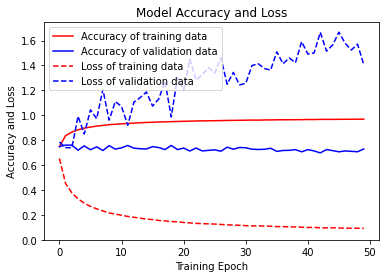

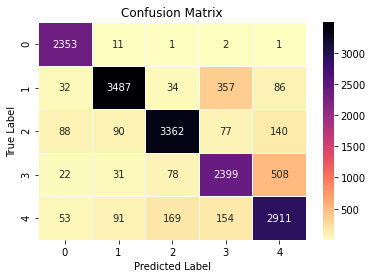

In [3]:
overlapPercents = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# overlapPercents = [0]
# exclude_subjects = ['ddAeJA42PXvwthbW', 'nan', 'LLZjAPTyj7muHsEf',
#                     'MMuX9YIh4NTbLZLM', 'cbOZWnI7s1y8oLD4', 'PE8D53oX060qLbdX', 'xYdtS1F8tDyjEIgN', 'sUZBISq61Y7I5tqQ']
exclude_subjects = ['ddAeJA42PXvwthbW', 'nan', '0DXZFsYOfgqsYe0Z',
                    '0UXFxu10k0En1vDK',
                    'KNmC3LADpLyH5qJA',
                    'YbJVcb4vFFjKKlfe',
                    'ewpnQDEzR8hTqPRY', ]
for OVERLAP_PERCENT in overlapPercents:
    gpus = tf.config.list_logical_devices('GPU')
    strategy = tf.distribute.MirroredStrategy(gpus)
    with strategy.scope():
        X, y, subjects = get_overlap_data_all_sessions(OVERLAP_PERCENT)
        # REMOVE UNWANTED SUBJECTS
        indexes = np.where(subjects == exclude_subjects)
        X = np.delete(X, indexes[0], axis=0)
        y = np.delete(y, indexes[0], axis=0)
        subjects = np.delete(subjects, indexes[0], axis=0)
        # END REMOVE UNWANTED SUBJECTS

        # AUGMENT DATA
        resultant_acc = compute_resultant_acceleration(X)
        resultant_gyro = compute_resultant_gyro(X)
        resultant_angle = compute_resultant_angle(X)
        resultant_acc = resultant_acc.reshape(
            resultant_acc.shape[0], resultant_acc.shape[1], 1)
        resultant_gyro = resultant_gyro.reshape(
            resultant_gyro.shape[0], resultant_gyro.shape[1], 1)
        resultant_angle = resultant_angle.reshape(
            resultant_angle.shape[0], resultant_angle.shape[1], 1)
        X = np.concatenate((X, resultant_acc), axis=2)
        X = np.concatenate((X, resultant_gyro), axis=2)
        X = np.concatenate((X, resultant_angle), axis=2)
        # AUGMENT DATA END

        # print('UNIQUE subjects:', np.unique(subjects))
        X_train, X_test, y_train, y_test, y_train_non_encoded, y_test_non_encoded = split_test_train_by_subjects(
            X, y, subjects, train_percent=0.9)

        model, history = train_model(
            X_train, y_train, X_test, y_test, overlap_percent=OVERLAP_PERCENT, batch_size=128, epochs=50, variant="cnn_lstm")
        n_steps, n_length = 4, 32
        X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, 12))
        evaluation_history = model.evaluate(
            X_test, y_test, batch_size=128, verbose=1)

        save_history(history, OVERLAP_PERCENT)
        save_test_history(evaluation_history, OVERLAP_PERCENT)
        save_accuracy_loss_figure(history, OVERLAP_PERCENT)
        validations, predictions = compute_validations_predictions(
            model, X_test, y_test)
        save_confusion_matrix_figure(
            validations, predictions, OVERLAP_PERCENT, sns)


In [4]:
print(model)
print(X_test.shape)
n_steps, n_length = 4, 32
X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, 12))
evaluation_history = model.evaluate(
    X_test, y_test, batch_size=16, verbose=1)


(16537, 4, 32, 12)
1034/1034 [==============================] - 5s 5ms/step - loss: 0.4687 - accuracy: 0.8775


In [5]:

validations, predictions = compute_validations_predictions(
            model, X_test, y_test)

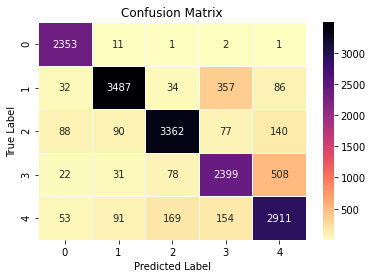

In [6]:
save_confusion_matrix_figure(
            validations, predictions, OVERLAP_PERCENT, sns)